
## Traffic Simulation
### Elisa Heinrich Mora 


*In this project, we will build cellular automata to model traffic flow.*

*Each cell is about the size of a car and cars travel along a road, passing other cars if they can. You will see how cellular automata can be used to model some realistic traffic patterns and explore what happens if driver behavior changes.*

### Part 1: Traffic jams on a circular road

For Part 1, implement a single lane, variable speed traffic model described in Nagel, K., Schrenckenberg, M. (1992)

- Write well-structures and well-documented Python code to implement the model described in the paper. 

- Visualize the state of this model over time, to show how traffic jams can appear when traffic density is high enough.

- Analyze how the overall average traffic flow rate varies with traffic density and present your results in your report. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class TrafficSimulation:

    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5):
        
        '''
        Constructor that accept the model parameters: 
        Inputs: 
            - Length(int) Number of cells in the road. Default: 100
            
            - Car_density(float) Fractions of cells that have a car on them. Default: 0.2
            
            - Slow_down_prob(Float) Probability that a car will randomly 
            slow down by 1 during the update step. Default: 0.5
            
            - Max_speed(int) The maximum speed in car cells per update step. Default: 5
       
       Initializing the state here. 
        
        '''
        
        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        
        #populate the cells, cars distributed ramdomly along the road
        # and start with random velocities
        
        #initialize the array to have the correct number of cars, 
        #matching the traffic density model parameter
        random_indexes = np.random.choice(
            range(self.length),
            size=int(round(car_density * self.length)),
            replace=False)
        

        
        #using -1 to represent empty cells
        self.state = -np.ones(self.length, dtype=int) 
        
        #using non negative integers from 0 up to max_speed to represent
        #cars in different speeds
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))
        
        #tracking the time steps and total number of cars that passed 
        #the simulation boundary to estimate average traffic flow
        
        self.time_step=0
        self.cumulative_traffic_flow=0.
        

    def step(self, display=True):
        
        '''
        Advance on time step in the simulation. 
        Input:
            - Display(bool) Whether to display the state of the simulation. Default: True
            
        Implementing the update rules through a for loop, 
        checking if a cell contains a car and adjusting its velocity as 
        per the rules. 
        
        We use another loop to advance all cars by their velocities,
        considering the periodic boundary condition.
        
        
        '''
        
        #implementing update rules
        #checking if a cell contains a car and adjusting 
        #its velocity as per the rules.
        
        for i in range(self.length):
            
            #distance is defined as the number of 
            #empty cells between the two cars plus one
            if self.state[i] != -1:
                distance = 1  
                
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1
                    
                #Acceleration    
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                
                #Deceleration
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                
                # Randomization
                #Probability that a car will randomly slow down by 1 during the update step
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1

        if display:
            self.display()


        #We use another loop to advance all cars by their new velocities,
        #considering the periodic boundary condition.
        
        new_state = -np.ones(self.length, dtype=int)
        
        for i in range(self.length):
            
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]
        
        self.state = new_state
        
        #update time and traffic flow
        self.time_step += 1
        for i in range(self.max_speed):
            if self.state[i] > i:
                self.cumulative_traffic_flow += 1


    def display(self):
        
        '''
        Method to visualize the state of the model: printing out the 
        current state of the simulation
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state))
        

In [ ]:
#Figure 1
#Low traffic density
sim = TrafficSimulation(length=100, car_density=0.03, slow_down_prob=0.5)

print('Figure 1')
print('')
print('')

for i in range(50):
    sim.step()

In [ ]:
#Figure 2
#High traffic density
sim = TrafficSimulation(length=100, car_density=0.1, slow_down_prob=0.5)

print('Figure 2')
print('')
print('')
for i in range(50):
    sim.step()

In [ ]:
data_flow = []
data_density = []
for density in np.concatenate((np.arange(0.01, 0.079, 0.02), [0.08], np.arange(0.09, 0.109, 0.002), [0.11, 0.115, 0.12, 0.13, 0.14], np.arange(0.15, 1, 0.05))):
    data_density.append(density)
    data_flow.append([])
    for run in range(10):
        sim = TrafficSimulation(car_density=density)
        for i in range(50):
            sim.step(display=False)
        data_flow[-1].append(sim.cumulative_traffic_flow / sim.time_step)

In [ ]:
#Figure 3
#plot results
m = np.mean(np.array(data_flow), axis=1)
s = np.std(np.array(data_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
plt.plot(data_density, m + 1.96*s, 'k--')
plt.plot(data_density, m - 1.96*s, 'k--')
plt.title('Figure 3')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.show()

In [ ]:
#Figure 4
#zoom in on critical region
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
plt.plot(data_density, m + 1.96*s, 'k--')
plt.plot(data_density, m - 1.96*s, 'k--')
plt.title('Figure 4- Zoom in on critical region')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.xlim(0.05, 0.15)
plt.ylim(0.25, 0.5)
plt.show()

In [ ]:
data_flow = []
data_density = []

densities = np.arange(0, 0.8, 0.1)
for density in densities:
# for density in np.concatenate((np.arange(0.01, 0.079, 0.02), [0.08], np.arange(0.09, 0.109, 0.002), [0.11, 0.115, 0.12, 0.13, 0.14], np.arange(0.15, 1, 0.05))):
    data_density.append(density)
    data_flow.append([])
    for run in range(10):
        sim = TrafficSimulation(car_density=density, slow_down_prob=0.)
        for i in range(50):
            sim.step(display=False)
        data_flow[-1].append(sim.cumulative_traffic_flow / sim.time_step)

In [ ]:
#Figure 5
#plot results
m = np.mean(np.array(data_flow), axis=1)
s = np.std(np.array(data_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
plt.plot(data_density, m + 1.96*s, 'k--')
plt.plot(data_density, m - 1.96*s, 'k--')
plt.title('Figure 5- No Ideal Traffic Flow')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.show()

### The Model

This will simulate a single lane of high speed traffic based on the works by Nagel and Schreckenberg (1992) and Rickert et al. (1996). We use a discrete cellular automaton where each cell contains either: no car (state value= -1) or one car with speed(equal to the state value ranging from 0 to the max_speed=5). We assume that the number of cars remain unchanged throughout the simulation. 
 
We use the Rule 184 with periodic boundary conditions, to be able to observe long term behavior. This is a one dimensional binary cellular automaton rule used as a simple model for traffic flow in a single lane of a highway. In each step of its evolution, the Rule 184 automaton applied the update rules to each of the cells (cars) in the array, simultaneously for all cells, to determine the new state of the cell. The new state of each cell is then defined as a function of the previous state and the previous values of the neighboring cells. 

Given that for any finite set of cells with periodic boundary conditions, the number of 1s and the number of 0s in a pattern remains invariant throughout the pattern's evolution, Rule 184 is the only elementary cellular automata to have this property of number conservation, which is ideal for traffic simulations.   

In this simulation, we extend the Rule 184 by including one dimensional model with vehicles moving at multiple speeds. In the second part, we will extend the Rule 184 dynamics to two-lane highway traffic with lane changes; this model shares with Rule 184 the property that it is symmetric under simultaneous left-right and 0-1 reversal.

In each step, the following four actions are conducted in order from first to last, and all are applied to all cars. In each action the updates are applied to all cars in parallel, as mentioned before:

- Acceleration: All cars not at the maximum velocity have their velocity increased by one unit. 

- Deceleration: All cars are checked to see if the distance between it and the car in front is smaller than its current velocity. If the distance is smaller than the velocity, the velocity is reduced to the number of empty cells in front of the car to avoid collision. 

- Randomization: The speed of all cars that have a velocity of at least 1, is now reduced by one unit with an input probability. 

Finally, all cars are moved forward the number of cells equal to their velocity.

### Implementation

We calculate the distance between each car and the next car. In this case, the distance is defined as the number of empty cells between the two cars plus one. This will determine whether the car can speed up or will slow down. After this, we will go through the Update rules, in order to determine what the car's new speed will be. Given that the cars are updated in parallel, we calculate the velocities for all cars before moving forward.

In each step, the following four actions are conducted in order from first to last, and all are applied to all cars. In each action the updates are applied to all cars in parallel, as mentioned before:

- Acceleration: if the velocity v of a vehicle is lower than the max_speed and if the distance to the next car is larger than v+1, the speed is advanced by one [v --> v+1] 

- Deceleration: if a vehicle at side i sees the next vehicle at side i+j (with j =< v), it reduces its speed to j-1 [v --> j-1] 

- Randomization: with probability p, the velocity of each vehicle (if greater than zero) is decreased by one [v --> v-1]

- Motion: each vehicle is advanced v sites.

The traffic density is defined as the number of cars per unit of road (N/L). On the other hand, traffic flow rate is defined as the average number of cars passing per unit time between any two particular cells assuming behavior is consistent across different slots.



### Analysis

As we can see, traffic jams can be created without any problems on the road, no obstacles or accidents. The slowing down of a car can have a knock-on effect on all other cars behing it, causing a bottleneck on the road for no apparent reason. We recreate this phenomena through our CA model. 

Without the randomization step, the model is a deterministic algorithm, which means that the cars always move in a set pattern once the original state of the road is set. Randomization has the effect of rounding off an otherwise sharp transition. One car braking due to a random slow can slow down the cars behind, spontaneously creating a jam. Without this randomness, every initial configuration of vehicles and corresponding velocities reaches very quickly a stationary pattern which is shifted backwards one site per time step.

Given that we are using Rule 184, we can easily see that the model quickly stabilizes either to a pattern in which the cell states move in lockstep one position leftwards of rightwards at each step. Specifically, as we saw in the first two figures, if the initial density of cells is less than 50%, the pattern stabilizes into clusters of occupied cells, spaced two units apart, with the clusters separated by blocks of empty cells. Patterns of this type move rightwards. If, on the other hand, the initial density is greater than 50%, the pattern stabilizes into clusters of empty cells, spaced two units apart, with the clusters separated by blocks of occupied cells, and patterns of this type move leftwards. If the density is exactly 50%, the initial pattern stabilizes (more slowly) to a pattern that can equivalently be viewed as moving either leftwards or rightwards at each step: an alternating sequence of 0s and 1s. Basically, this decently predicts some emergent features of real traffic: clusters of freely moving cars separated by stretches of open road when traffic is light, and waves of stop-and-go traffic when it is heavy.

In addition, just as we demonstrated in class, although Rule 184 is not symmetric under left-right reversal, it does have a different symmetry: reversing left and right and at the same time swapping the roles of empty and occupied cells (just as the first session, with white and black cells simulation) produces a cellular automaton with the same update rule.

As we can see in the figures 1 and 2, cars are shown as int numbers. Then, for example, if the road had a single car on it the plot would be complete of dots, except for a single integer number line of   slope -1/5 (with maximum speed =5). The lines have slopes that are steeper, indicating that jamming is slowing the cars down. Traffic jams show up as bands of numbers, groups of cars that are node-to-tail and moving slowly to the right. The rippling of the bands is due to the randomization step. As we can see, when jamming occurs the distribution of cars along the road becomes highly non-uniform. 

We can observe the third and fourth figures, which represents the traffic flow as a function of the density of cars with default values in all the parameters, except the densities. We notice that flow increases until the capacity of the road is reached. Once this occurs, the cars reduce their speed for each other at the peak with a density around 0.11, with a flow of 0.45 cars per time step. As the density increases further, the flow decreases until it reaches zero when the road is 100% occupied. Meaning that the higher the density from here then worse the system performs.

If we consider an ideal deterministic system, that could describe potential behavior of autonomous vehicles, (considering the probability of slowdown as 0) then we will notice, as in figure 5, that all cars maintain their maximum speed possible in the system. We can observe that the maximum flow now reaches up to approximately 0.8, in a density approximately on 0.2. Something interesting to observe is that even with the perfect behavior of the drivers, right after the peak there is a decrease of the flow with higher densities. This indicates that the decline of the flow is not just depending on the driver's behavior, but on the capacity limits.

### Part 2: Multi- lane highways

Implement the 2-lane, symmetric, uni-directional, variable speed model in Rickert, M., et al. (1996).

- A description, in your report, of how this model works. What are the assumptions, parameters, and update rules of the model? Do not just copy and paste from the paper. Explain the cellular automaton in your own words and as clearly as possible. 

- Write well-structured and well-documented Python code to implement the model described in the paper. 

- Visualize the state of this model over time, to show the typical traffic patterns that can emerge. Your results will again depend on traffic density.

- Analyze how much more traffic can flow through a multi-lane road, compare to a single lane road, at the same traffic density. Present your results in your report. 

In [19]:
display = True

class MultiLaneTrafficSimulator():
    
    def __init__(self, length=100, car_density=0.3, max_speed=5, slow_down_prob=0.5, n_lanes=1, switch_prob=1):
        
        '''
       New Input:
           - N_lanes (int) number of lanes. Default 2
           - Switch_prob (float) probability of a car to switch lanes. Default 1
        
        '''  
        
        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        self.n_lanes = n_lanes
        self.switch_prob = switch_prob
        
        #populating array according to the density
        self.state = -np.ones((self.n_lanes, self.length), dtype = int)
        
        for lane in range(n_lanes):
            for j in np.random.choice(range(int(self.length)),int(round(self.car_density*self.length))):
                self.state[lane,j] = np.random.randint(0,max_speed+1)

        #initializing 
        self.cumulative_traffic_flow = 0.0 
        self.time_step = 0.0    
        self.cars_changed = 0
        
        
        
    def change_lane(self, lane, i):
        
        '''
        Checking the changing lanes conditions
        Return lane in which this can move 
        (+1 to the right, -1 to the left, 0 not possible to move)
            
        '''   

            
        #checking cell ahead and behind in both sides

        lane_status = []
        for s in [-1, 1]:

            if lane + s >= 0 and lane + s <= self.n_lanes:

                #checking cell ahead
                forward_gap = 1

                while self.state[lane, (i + forward_gap) % self.length] == -1:
                    forward_gap += 1
                forward_gap -= 1

                other_forward_gap = 0
                other_back_gap = 0

                #checking both lanes in the side
                while self.state[lane + s, (i + other_forward_gap) % self.length] == -1:
                    other_forward_gap += 1
                other_forward_gap -= 2


                while self.state[lane + s, (i - other_back_gap) % self.length] == -1:
                    other_back_gap += 1
                other_back_gap -= 1

                temp_status = False

                #checking switching lanes conditions     
                if forward_gap < self.state[lane, i] + 1:
                    if other_forward_gap >= self.state[lane, i]:
                        if other_back_gap >= self.max_speed:
                            temp_status = True

                #check whether there is a car in the other side of the neighbor
                #lane to avoid colliding
                if self.state[lane+s, i] != -1:
                    temp_status = False
                lane_status.append(temp_status)

            else:
                lane_status.append(False)

        next_lane = 0

        #checking all possible combination of lane_status list
        if lane_status[0] == True:
            if lane_status[1] == True:
                next_lane = np.random.choice([-1, 1])
            else:
                next_lane = -1
        else:
            if lane_status[1] == True:
                next_lane = 1
            else:
                next_lane = 0

        if np.random.uniform() < self.switch_prob:
            return next_lane

        return 0
                  

    
    def step(self):
        
        '''
        Advance on time step in the simulation. 
        Input:
            - Display(bool) Whether to display the state of the simulation. Default: True
            
        Implementing the update rules through a for loop, 
        checking if a cell contains a car and adjusting its velocity as 
        per the rules. 
        
        We use another loop to advance all cars by their velocities,
        considering the periodic boundary condition.
        
        '''
        
        
        
        if self.n_lanes > 1:
            for lane in range(self.n_lanes):
                for i in range(self.length):
                    if self.state[lane, i] != -1:
                        lane_step = self.change_lane(lane, i)
                        if lane_step:
                            self.state[(lane + lane_step), i] = self.state[lane, i]
                            self.cars_changed = self.cars_changed + 1
                            self.state[lane, i] = -1

        # independent movement 
#         new_state = -np.ones((self.n_lanes, self.length), dtype=int)
        
#         for lane in range(self.n_lanes):
#             for i in range(self.length):
#                 if self.state[lane, i] != -1:
#                     # Acceleration
#                     if self.state[lane, i] < self.max_speed:
#                         self.state[lane, i] = self.state[lane, i] + 1

#                     for distance in range(1, self.state[lane, i] + 1):
#                         if self.state[lane, (i + distance) % self.length] != -1:
#                             distance = distance - 1
#                             break
                            
#                     self.state[lane, i] = distance
                    
#                     # Randomization
#                     if self.state[lane, i] > 0 and np.random.uniform() < self.slow_down_prob:
#                         self.state[lane, i] = self.state[lane, i] - 1
                        
#                     # Moving new velocities
#                     new_state[lane, (i + self.state[lane, i]) % self.length] = self.state[lane, i]
                    
    #                 if self.state[lane, i] != -1:
    #                     distance = 1

    #                     while self.state[lane, (i + distance) % self.length] == -1:
    #                         distance = distance + 1

    #                 # Deceleration
    #                     if self.state[lane, i] >= distance:
    #                         self.state[lane, i] = distance - 1

        for lane in range(self.n_lanes):
            for i in range(self.length):

                #distance is defined as the number of 
                #empty cells between the two cars plus one
                if self.state[lane][i] != -1:
                    distance = 1  

                    while self.state[lane][(i + distance) % self.length] == -1:
                        distance += 1

                    #Acceleration    
                    if self.state[lane][i] < self.max_speed:
                        self.state[lane][i] += 1

                    #Deceleration
                    if self.state[lane][i] >= distance:
                        self.state[lane][i] = distance - 1

                    # Randomization
                    #Probability that a car will randomly slow down by 1 during the update step
                    if (self.state[lane][i] > 0) and (np.random.uniform() < self.slow_down_prob):
                        self.state[lane][i] -= 1

        new_state = -np.ones((self.n_lanes, self.length), dtype = int)   
        
        for lane in range(self.n_lanes):
            for i in range(self.length):
                if self.state[lane][i] != -1:
                    new_state[lane][(i + self.state[lane][i]) % self.length] = self.state[lane][i]
        
        self.state = new_state
               
        
        #update time and traffic flow
        self.time_step += 1
        for lane in range(self.n_lanes):
            for i in range(self.max_speed):
                if self.state[lane][i] > i:
                    self.cumulative_traffic_flow += 1

    def calc_avg_flow(self):
        return self.cumulative_traffic_flow / (self.time_step*self.n_lanes)
        
        
    def display(self):
        
        '''
        Method to visualize the state of the model: printing out the 
        current state of the simulation
        '''
        
        for lane in range(self.n_lanes):
            print(''.join('.' if x == -1 else str(x) for x in self.state[lane]))
            
        if self.n_lanes > 1:
            print()
        


In [21]:
#Figure 6
print('Figure 6')
print('\n')

densities = [0.03,0.1, 0.2]
lanes = [1,2, 3]
for lane in lanes:
    for density in densities:
        sim = MultiLaneTrafficSimulator(n_lanes=lane, car_density=density)
        sim.display()

        for i in range(5):
            sim.step()
            sim.display()

        print("Density:", sim.car_density)
        print("Average traffic flow:", sim.calc_avg_flow())
        print("Total cars changed lane:", sim.cars_changed)
        print("\n")

Figure 6


.........1.......................................................0.............................2....
...........2......................................................1..............................2..
3.............3.....................................................2...............................
...3..............4...................................................2.............................
......3...............4..................................................3..........................
.........3................4..................................................4......................
Density: 0.03
Average traffic flow: 0.2
Total cars changed lane: 0


.....................5..............2........2................................2....2...0.3...4....44
....5....................4............2.........3................................3....3.1...3...3.0.
........4.....................5.........2...........4................................40..1....2..10.
...........

IndexError: index 2 is out of bounds for axis 0 with size 2

In [16]:
display = False
data_flow = []
data_density = []
densities = np.arange(0, 0.8, 0.01)
for density in densities:
    data_density.append(density)
    data_flow.append([])
    for run in range(20):
        sim = MultiLaneTrafficSimulator(n_lanes=1, length= 10, car_density=density)
        for i in range(50):
            sim.step()
        data_flow[-1].append((sim.traffic_flow / sim.time)/ sim.n_lanes)

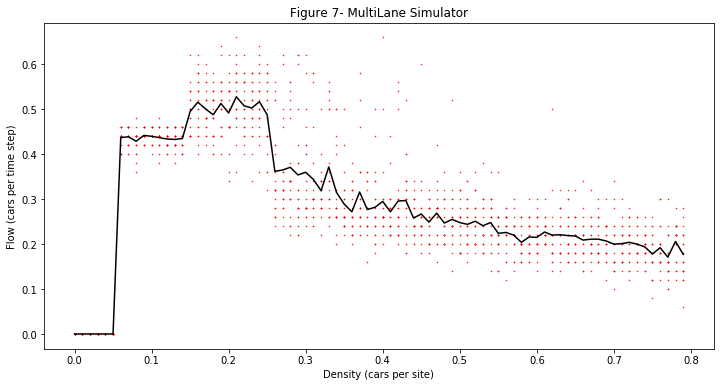

In [17]:
#Figure 7
#plot results
m = np.mean(np.array(data_flow), axis=1)
s = np.std(np.array(data_flow), axis=1)

lb_arr = []
ub_arr = []

for results in data_flow:
    lb, ub = np.percentile(np.array(results), [10,90])
    lb_arr.append(lb)
    ub_arr.append(ub)
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
# plt.plot(data_density, m + 1.96*s, 'k--')
# plt.plot(data_density, m - 1.96*s, 'k--')
# plt.plot(data_density, lb_arr, 'k--')
# plt.plot(data_density, ub_arr, 'k--')
plt.title('Figure 7- MultiLane Simulator')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.show()

In [8]:
len(data_flow[0])

20

In [ ]:
data_flow = []
data_density = []
densities = np.arange(0, 0.3, 0.01)
for density in densities:
    data_density.append(density)
    data_flow.append([])
    for run in range(20):
        sim = MultiLaneTrafficSimulator(length= 10, car_density=density)
        for i in range(30):
            sim.step()
        data_flow[-1].append((sim.traffic_flow / sim.time)/ sim.n_lanes)
    print(density, np.mean(data_flow))

### The model

In this more realistic model we will analyze how the dynamics of a system changes when we add multiple lanes. The hope of this strategy is to better distribute the load of cars and improve the efficiency of the traffic flow.  

This model consiste of two parallel single lane models with periodic boundary conditions and additional rules that determines whether a vehicle will switch between the lanes. We will assume that cars are only moved sideways, they do not advance. We will be implementing this as a strict parallel update making its decision in function of the previous configuration.

- We need to obtain the distance with the next car. 

- If this distance is smaller than the car's velocity +1, we will check if we can switch lanes. 

- We will get the distance to the next and previous cars on the neighboring lanes

- We will check both lanes, identifying which is free. If both lanes are available, we choose a random lane

- Finally, we will switch given a certain probability, if the distance to the next car on the neighboring lane is greater than the distance with the next car in our lane, and if the distance to the previous car on the neighboring lane is greater than their speed + 1. 

Basically, the lane switches will occur before the update of any speeds, and occurs only in the case that a car cannot keep going at its current speed on its lane, but could, otherwise in a neighbor lane, without possibly obstruction to other cars. Before performing the switches, we check possible collisions for cars trying to merge to the same lane at the same time,specifically for models with more than 2 lanes.  

As we can observe the resulting behavior for 2 lanes leads to  a more dynamic system, in which cars can movilize from possible jams congestures. However, given the tight restriction of available switching space on each lane, this is not efficiently used. 

Given that flow is presented per lane, for multi-lane models we will divide the traffic flow by the total number of lanes. In order to improve the driver's behavior we can switch the probability to switch by a lower value, in order to prevent ping pong behavior. This behavior basically means that a group of cars initially stuck in a jam, switches to a free lane together, just to repeat the same situation. 

We can also examine the same scenario for more lanes, with stable parameters, in order to see the fluctuations of the traffic flow with higher number of lanes. In this case, we can predict that flow will just slighly increase as well. This basically will indicate that more lanes does not actually significantly improves the traffic flow.


### Key Questions

* **How much more traffic can flow through a 2-lane road compare to a 1-lane road at the same traffic density? What about roads with more than 2 lanes?**

The 2-lane model only slightly differs from the single-lane model. It minimally differs from the traffic flow with a single-lane model. This is because, as mentioned before, even when there are more possibilities to dynamically avoid traffic, availability of lane switching is not always possible. In addition, lane switching is another factor that can increase bad behavior of the drivers in the real world.

* **How applicable is this model to traffic in Buenos Aires?**

All the presented models made very simple and significant assumptions, which do not accurately described the real world behavior. Argentina presents a wide variety of transportation mediums in the roads, including bikes, buses, taxis, metro, skateboards, that can affect the flow of the traffic. This without including bridges that at certain moments of the day closed the road to allow boats to cross around the city. To model this, we would need to consider different agents with different restrictions. Considering the random driver behavior, given that argentinians are well known for easily react to stimulus, can be a pertinent description of the dynamics of the system. However, better analysis of bad behavior the drivers in high number of lanes is necessary considering that Buenos Aires counts with one of the widest roads in the world.

* **Future work**

Extensions of this model should be oriented to more specific case studies, including intersections, traffic lights, lane merges, etc. This would also include turning or crossing intersections, that would have similar behavior to the switching lanes. In addition, we can include model with more variation in driver's behaviors such as willingness to in front off other people, that could vary depending on seasons, or times. More advanced and details models, can associate each car in the system with specific behaviors that are considered in the step class. 
We can also consider different types of metrics to evaluate the behavior of the system. For example, in multi-lane models different cars in different lanes can experience the system differently. We can consider the average duration of a cycle and its distributions, in order to achieve a more efficient system for all the users. 

In [ ]:
        # independent movement 
#         new_state = -np.ones((self.n_lanes, self.length), dtype=int)
        
#         for lane in range(self.n_lanes):
#             for i in range(self.length):
#                 if self.state[lane, i] != -1:
#                     # Acceleration
#                     if self.state[lane, i] < self.max_speed:
#                         self.state[lane, i] = self.state[lane, i] + 1

#                     for distance in range(1, self.state[lane, i] + 1):
#                         if self.state[lane, (i + distance) % self.length] != -1:
#                             distance = distance - 1
#                             break
                            
#                     self.state[lane, i] = distance
                    
#                     # Randomization
#                     if self.state[lane, i] > 0 and np.random.uniform() < self.slow_down_prob:
#                         self.state[lane, i] = self.state[lane, i] - 1
                        
#                     # Moving new velocities
#                     new_state[lane, (i + self.state[lane, i]) % self.length] = self.state[lane, i]
                    
    #                 if self.state[lane, i] != -1:
    #                     distance = 1

    #                     while self.state[lane, (i + distance) % self.length] == -1:
    #                         distance = distance + 1

    #                 # Deceleration
    #                     if self.state[lane, i] >= distance:
    #                         self.state[lane, i] = distance - 1